In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [3]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

Text(0, 0.5, 'u')

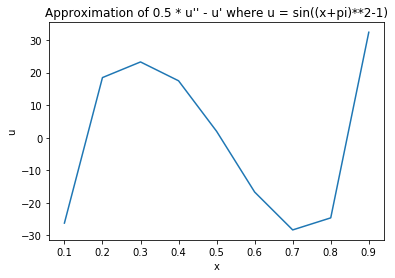

In [9]:
n = 10
a = 0
b = 1
h = (b-a)/ n
x = np.linspace(a, b, n+1)
ones = np.ones(n-2)

# Define function u(x)
u = lambda x: np.sin((x+np.pi)**2 - 1)
u_x = u(x[1:n])

# Construct diagonal matricies
off_diag1 = np.diag(ones, k=1) + np.diag(-ones, k=-1)
off_diag2 = np.diag(-2*np.ones(n-1)) + np.diag(ones, k=1) + np.diag(ones, k=-1)
vec1 = np.zeros(n-1)
vec2 = np.zeros(n-1)
vec1[0] = -u_x[0] / 2*h
vec1[-1] = u_x[-1] / 2*h
vec2[0] = u_x[0] / h**2
vec2[-1] = u_x[-1] / h**2

# Approximate 1st derivative
u_prime = 1/(2*h) * off_diag1 @ u_x + vec1

# Approximate 2nd derivative
u_prime2 = 1/h**2 * off_diag2 @ u_x + vec2

# Diff equation
result = 0.5 * u_prime2 - u_prime

plt.plot(x[1:n], result)
plt.title("Approximation of 0.5 * u'' - u' where u = sin((x+pi)**2-1)")
plt.xlabel("x")
plt.ylabel("u")

# x_sol = np.linspace(0, 1, 1000)
# true_solution = lambda x: 1/2*(2*np.cos((np.pi + x)**2 - 1) - 4*(x + np.pi)**2 * np.sin((x + np.pi)**2 - 1)) - 2*(x + np.pi)*np.cos((x + np.pi)**2 - 1)
# plt.plot(x_sol, true_solution(x_sol), label = "True solution")

# Problem 2

Use equation (1.9) to solve the singularly perturbed BVP (1.7) with $\epsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\epsilon$. For $\epsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

Text(0, 0.5, 'u(x)')

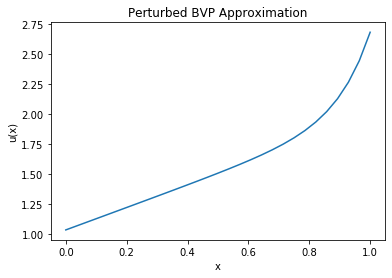

In [26]:
# f = ep*u'' - u' x in (0, 1) u(0) = alpha, u(1) = beta
a, b, alpha, beta, n, epsilon = 0, 1, 1, 3, 30, 0.1 
f_x = -1 * np.ones(n)
h = (b - a) / n
x = np.linspace(a, b, n+1)
# Construct diag matrix
diag = 1/h**2 * (np.diag(-2*epsilon * np.ones(n-1)) + \
        np.diag((epsilon-h/2) * np.ones(n-2), k=1) + \
        np.diag((epsilon+h/2) * np.ones(n-2), k=-1))

# Construct equals vector
f_vec = f_x[1:n]
f_vec[0] -= alpha * (epsilon + h/2)/h**2
f_vec[-1] -= beta * (epsilon - h/2)/h**2

result = np.linalg.inv(diag) @ f_vec

plt.plot(np.linspace(0, 1, n-1), result)
plt.title("Perturbed BVP Approximation")
plt.xlabel("x")
plt.ylabel("u(x)")

# Problem 3

Visualize the $\mathcal{O}(h^2)$ convergence of this finite difference method by producing a loglog plot similar to Figure 1.2, except in the case $\epsilon=.1$. Implement a function `singular_bvp` to compute the finite difference solution to (1.7). Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. Note that, since the number of subintervals for each approximation is a multiple of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


In [24]:
def singular_bvp(eps,alpha,beta,f,n):
    """Solves the singularly perturbed BVP (1.7) using finite differences."""
    a, b = 0, 1 
    
    x = np.linspace(a, b, n+1)
    f_x = f(x)
    h = (b - a) / n
    # Construct diag matrix
    diag = 1/h**2 * (np.diag(-2*epsilon * np.ones(n-1)) + \
            np.diag((epsilon-h/2) * np.ones(n-2), k=1) + \
            np.diag((epsilon+h/2) * np.ones(n-2), k=-1))

    # Construct equals vector
    f_vec = f_x[1:n]
    f_vec[0] -= alpha * (epsilon + h/2)/h**2
    f_vec[-1] -= beta * (epsilon - h/2)/h**2

    result = np.linalg.inv(diag) @ f_vec
    
    return np.concatenate((np.array([alpha]), result, np.array([beta])))
    

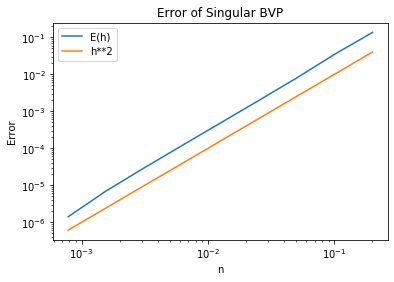

In [25]:
n = 10
alpha, beta, epsilon = 1, 3, 0.1 
f = lambda x : -1 * np.ones(n)
n_list = [5*2**i for i in range(n)]
results = []
errors = []
true_sol = None
for n in n_list:
    if n != 5*2**9:
        results.append(singular_bvp(epsilon, alpha, beta, f, n))
    else:
        true_sol = singular_bvp(epsilon, alpha, beta, f, n)
for i, result in enumerate(results):
    errors.append(np.max(np.abs(result - true_sol[::2**(9-i)])))
h = (1/np.array(n_list)[:9])
plt.loglog(h, errors, label="E(h)")
plt.loglog(h, h**2, label="h**2")
plt.xlabel("n")
plt.ylabel("Error")
plt.title("Error of Singular BVP")
plt.legend()

# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y'' +a_2(x)y'+ a_3(x) y = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\epsilon y'' - 4(\pi - x^2)y = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\epsilon = 0.1$ on a grid with $n=30$ subintervals.

In [5]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
       using finite differences."""
    # Convert functions to arrays of their evaluations
    x = np.linspace(a, b, n+1)
    f_x = f(x)
    a1_x = a1(x)
    a2_x = a2(x)
    a3_x = a3(x)
    h = (b - a) / n
    
    # Construct diag matrix
    # First derivative matrix operator
    D1 = (1/(2*h)) * (np.diag(a2_x[1:n-1], k=1) + np.diag(-a2_x[2:n], k=-1))
    # Second derivative matrix operator
    D2 = 1/h**2 * (np.diag(-2*a1_x[1:n]) + np.diag(a1_x[1:n-1], k=1) + np.diag(a1_x[2:n], k=-1))
    # Function matrix operator
    U = np.diag(a3_x[1:n])
    # Combine operators into a single matrix
    diag =  (D1 + D2 + U)

    # Construct equals vector
    f_vec = f_x[1:n]
    f_vec[0] -= alpha * (a1_x[1]/h**2 - a2_x[1]/(2*h))
    f_vec[-1] -= beta * (a1_x[-2]/h**2 + a2_x[-2]/(2*h)) 
    
    # Solve equation Ax=b by x=A.inverse() @ b
    result = np.linalg.inv(diag) @ f_vec
    
    # Add back in initial conditions to array to get back to n+1 size
    return np.concatenate((np.array([alpha]), result, np.array([beta])))

Text(0, 0.5, 'y')

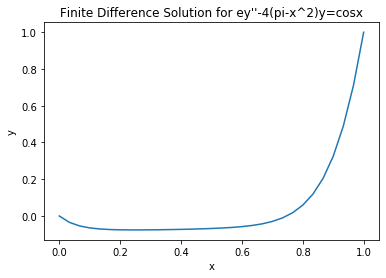

In [11]:
n = 30
a1 = lambda x : 0.1 * np.ones(len(x))
a2 = lambda x : np.zeros(len(x))
a3 = lambda x : -4 * (np.pi - x**2)
f = lambda x : np.cos(x)
result = bvp(0, np.pi/2, 0, 1, a1, a2, a3, f, n)
x = np.linspace(a, b, n+1)
plt.plot(x, result)
plt.title("Finite Difference Solution for ey''-4(pi-x^2)y=cosx")
plt.xlabel("x")
plt.ylabel("y")

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\epsilon y'' + xy' = -\epsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\epsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals.

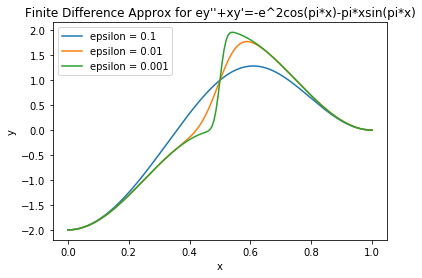

In [10]:
n = 150
epsilons = [0.1, 0.01, 0.001]
cos = np.cos
sin = np.sin
pi = np.pi
for i, epsilon in enumerate(epsilons):
    # Define functions in equation
    a1 = lambda x : epsilon * np.ones(len(x))
    a2 = lambda x : x
    a3 = lambda x : np.zeros(len(x))
    f = lambda x : -1*epsilon * pi**2 * cos(pi*x) - pi*x * sin(pi*x)
    
    # Approximate solution
    result = bvp(-1, 1, -2, 0, a1, a2, a3, f, n)
    x = np.linspace(a, b, n+1)
    
    # Plot solution
    plt.plot(x, result, label="epsilon = " + str(epsilon))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Finite Difference Approx for ey''+xy'=-e^2cos(pi*x)-pi*xsin(pi*x)")
plt.legend()
plt.show()

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\epsilon +x^2)y'' + 4xy' + 2y = 0, \\
	y(-1) = 1/(1+\epsilon), \quad y(1) = 1/(1+\epsilon),
\end{align*}

for $\epsilon = 0.05, 0.02$. Use a grid with $n=150$ subintervals.

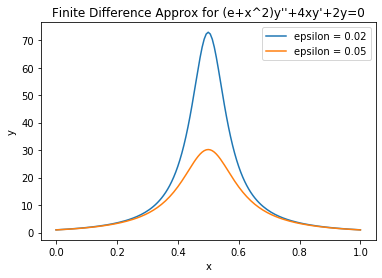

In [9]:
n = 150
epsilons = [0.02, 0.05]
for i, epsilon in enumerate(epsilons):
    # Define functions in equations
    a1 = lambda x : epsilon + x**2
    a2 = lambda x : 4*x
    a3 = lambda x : 2*np.ones(len(x))
    f = lambda x : -1*epsilon * pi**2 * cos(pi*x) - pi*x * sin(pi*x)
    
    # Approximate Solution
    result = bvp(-1, 1, 1/(1+epsilon), 1/(1+epsilon), a1, a2, a3, f, n)
    x = np.linspace(a, b, n+1)
    
    # Plot solution
    plt.plot(x, result, label="epsilon = " + str(epsilon))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Finite Difference Approx for (e+x^2)y''+4xy'+2y=0")
plt.legend()
plt.show()